In [6]:
from google.colab import files
import pandas as pd

# Upload the IMDB dataset file (e.g., CSV)
uploaded = files.upload()

# Get the filename (assuming it's named 'movie_reviews.csv')
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Verify upload
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(df.head())

Saving IMDB-Dataset.zip to IMDB-Dataset.zip
Dataset loaded successfully!
Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert labels to binary (0 = negative, 1 = positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=256, truncating='post')

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['sentiment'], test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (40000, 256)
Test data shape: (10000, 256)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=256),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=5,  # Reduce epochs if short on time
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 423ms/step - accuracy: 0.7518 - loss: 0.4836 - val_accuracy: 0.8729 - val_loss: 0.3092
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 419ms/step - accuracy: 0.9005 - loss: 0.2586 - val_accuracy: 0.8869 - val_loss: 0.2934
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 423ms/step - accuracy: 0.9260 - loss: 0.2015 - val_accuracy: 0.8834 - val_loss: 0.2863
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 420ms/step - accuracy: 0.9476 - loss: 0.1477 - val_accuracy: 0.8813 - val_loss: 0.3369
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 426ms/step - accuracy: 0.9611 - loss: 0.1152 - val_accuracy: 0.8621 - val_loss: 0.3491


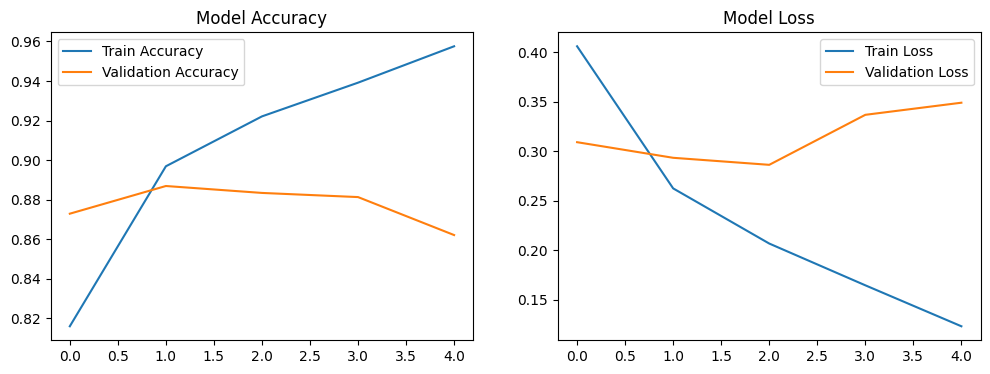

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [11]:
# Sample prediction
sample_text = ["This movie was a waste of time. Horrible acting!"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=256)

prediction = model.predict(sample_padded)[0][0]
sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Predicted Sentiment: {sentiment} ({prediction:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
Predicted Sentiment: Negative (0.0021)
